In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score

In [2]:
digits= datasets.load_digits(as_frame=True)

In [3]:
imgs = list(digits.images)
target = list(digits.target)

In [4]:
def plot_img(img):
    plt.imshow(img)
    plt.show()

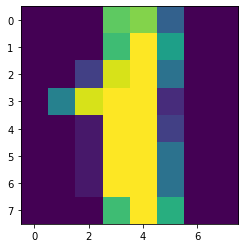

In [5]:
plot_img(imgs[1])

In [6]:
#n_samples = len(digits.images)
#features = digits.images.reshape((n_samples,-1))
features = digits.data

In [7]:
trainX, testX, trainY, testY = train_test_split(features, digits.target, random_state=58, test_size=0.2)

In [8]:
model_LogReg = LogisticRegression().fit(trainX, trainY)
accuracy_score(testY, model_LogReg.predict(testX))

E:\Edureka_Python-Course\edu-py\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9666666666666667

In [9]:
pca = PCA(n_components=0.95)
pca.fit(features)
df_pca = pca.transform(features)

In [10]:
df_pca.shape

(1797, 29)

>## 29 Principle Axes

In [11]:
pca_trainX, pca_testX, pca_trainY, pca_testY = train_test_split(df_pca, digits.target, random_state=58, test_size=0.2)

In [12]:
model_LogReg_pca = LogisticRegression().fit(pca_trainX, pca_trainY)
y_predictions_pca = model_LogReg_pca.predict(pca_testX)
accuracy_score(pca_testY, y_predictions_pca)

E:\Edureka_Python-Course\edu-py\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.95

>## The Accuracy has not seen an improvement, rather decreased by 1 percent

In [55]:
conf_matrix = confusion_matrix(pca_testY, y_predictions_pca,)
wrong = 0
for i in range(len(conf_matrix)):
    wrong+=conf_matrix[i:i+1,i:i+1]
wrong = len(testY) - wrong
print(wrong)

[[18]]


In [16]:
34+31+28+31+42+40+36+33+34+33

342

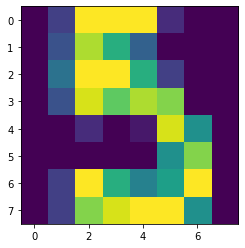

Actual Label : 5
Prediction   : 9


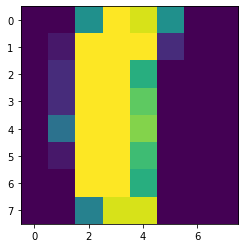

Actual Label : 1
Prediction   : 8


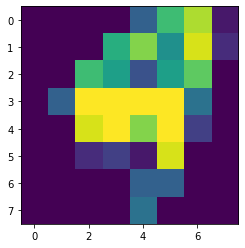

Actual Label : 9
Prediction   : 7


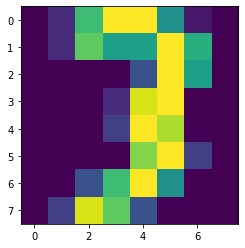

Actual Label : 3
Prediction   : 7


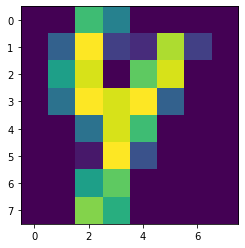

Actual Label : 4
Prediction   : 8


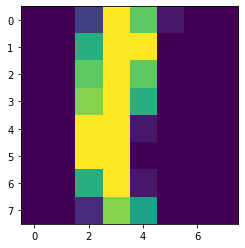

Actual Label : 1
Prediction   : 8


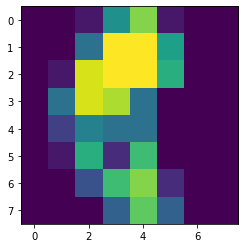

Actual Label : 8
Prediction   : 1


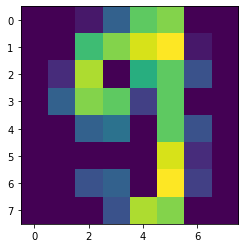

Actual Label : 9
Prediction   : 8


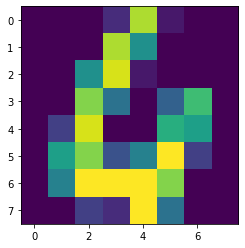

Actual Label : 4
Prediction   : 0


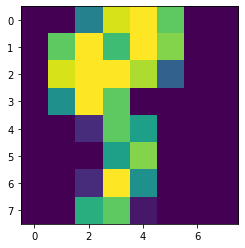

Actual Label : 9
Prediction   : 1


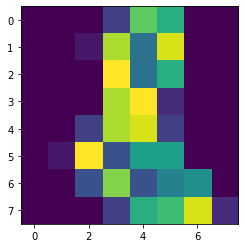

Actual Label : 8
Prediction   : 1


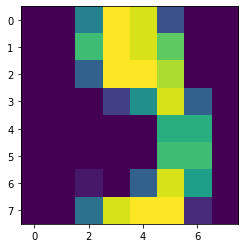

Actual Label : 9
Prediction   : 3


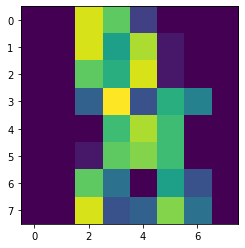

Actual Label : 8
Prediction   : 4


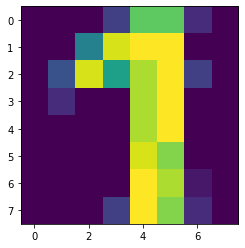

Actual Label : 1
Prediction   : 3


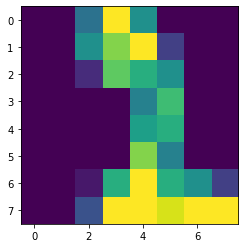

Actual Label : 2
Prediction   : 1


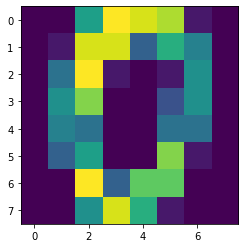

Actual Label : 0
Prediction   : 5


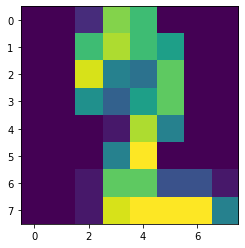

Actual Label : 2
Prediction   : 1


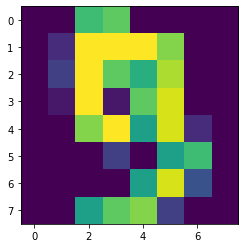

Actual Label : 9
Prediction   : 5


In [48]:
for i in range(len(pca_testX)):
    if y_predictions_pca[i] != pca_testY.iloc[i]:
        plt.imshow(digits.images[pca_testY.index[i]])
        plt.show()
        #print(y_predictions_pca[i])
        #print(pca_testY.iloc[i])
        print(f'Actual Label : {digits.target[pca_testY.index[i]]}\nPrediction   : {y_predictions_pca[i]}')

In [25]:
pca_testY.iloc[0]

1

In [27]:
y_predictions_pca[0]

1

In [29]:
pca_testY.index[0]

647

In [36]:
len(digits.images)

1797

In [38]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])